# Моделирование нелинейных систем. ДЗ-8 Динамический хаос. 

Выполнил: Давыдов Владислав Олегович

Преподаватель: Соловьев Виктор Роальдович

8 семестр, кафедра нанометрологии и наноматериалов

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp

### $$ \ddot \theta + 2 \gamma \dot \theta + ( \omega_0^2 + 2 A \cos{ \omega t }) \sin \theta = 0 $$

### Начальные параметры:
$$ \omega = 2 \omega_0 $$
$$ \gamma = 0.1 $$
$$ \omega_0 = 1 $$
$$ T = \dfrac{2 \pi}{\omega} $$
$$ \textbf{A = 0.5} $$
Причем параметр A изменяем с 0.5 до 1.05

In [231]:
gamma = 0.1
omega_0 = 1.0
A = 0.5
omega = omega_0/2
tmax = 10000

In [232]:
def equation(t, y):
    theta, theta_dot = y
    theta_double_dot = -2 * gamma * theta_dot - (omega_0**2 + 2 * A * np.cos(omega * t)) * np.sin(theta)
    return [theta_dot, theta_double_dot]

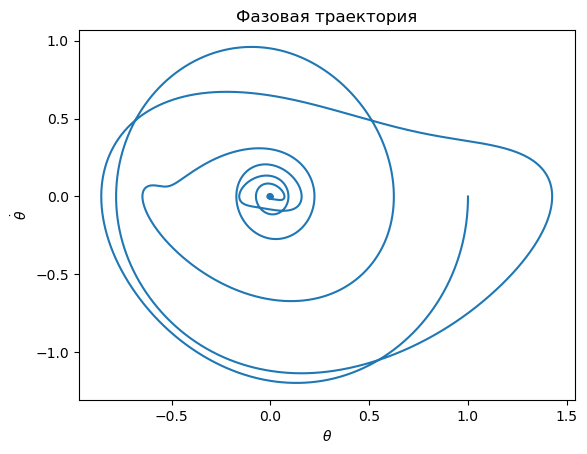

In [233]:
y0 = [1, 0]

sol = solve_ivp(equation, [0, tmax], y0, dense_output=True)

t = np.linspace(0, tmax, int(tmax*1e3))
y = sol.sol(t)
plt.plot(y[0], y[1])
plt.xlabel('$\\theta$')
plt.ylabel('$\\dot \\theta$')
plt.title('Фазовая траектория')
plt.show()

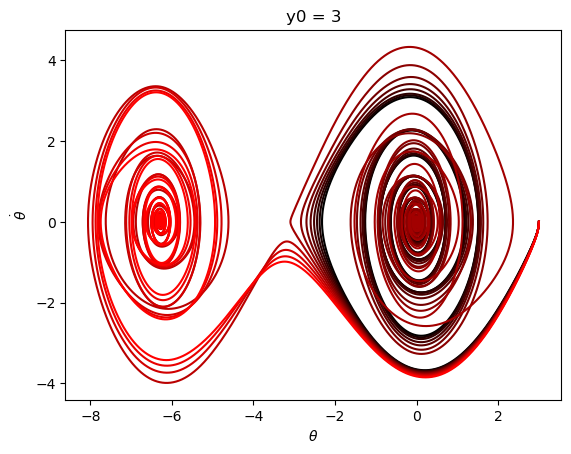

In [241]:
gamma = 0.1
omega_0 = 2.0
A = 0.5
omega = omega_0/2
tmax = 1e3
t = np.linspace(0, tmax, int(1e3*tmax))

A_array = np.linspace(0.5, 1.05, 12)
y0 = [3, 0]
fig, ax = plt.subplots()
for A in A_array:
    color_in = (A-min(A_array))/(max(A_array)-min(A_array))
    sol = solve_ivp(equation, [0, tmax], y0, dense_output=True)
    y = sol.sol(t)
    ax.plot(y[0], y[1], label=f'A={round(A, 2)}', c=(color_in, 0, 0))
    ax.set_xlabel('$\\theta$')
    ax.set_ylabel('$\\dot \\theta$')
    #ax.legend()
    ax.set_title(f'y0 = {y0[0]}')

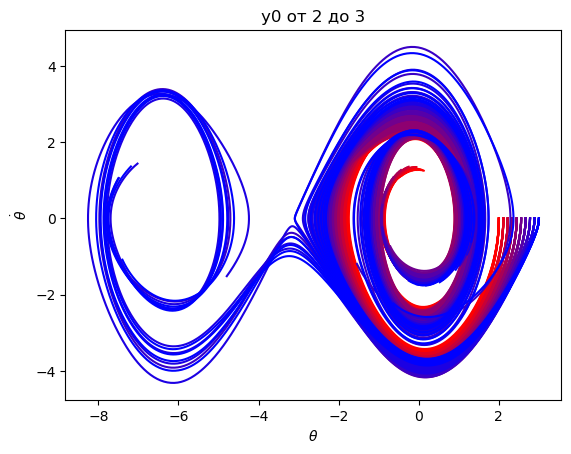

In [203]:
gamma = 0.1
omega_0 = 2.0
A = 0.5
omega = omega_0/2
ymin = 2
ymax = 3
t = np.linspace(0, 10, 1000)

A_array = np.linspace(0.5, 1.05, 12)
y_array = np.linspace(ymin, ymax, 10)
y0 = [3, 0]
fig, ax = plt.subplots()
for lium in y_array:
    y0[0] = lium
    color_index = (lium-ymin)/(ymax-ymin)
    for A in A_array:
        sol = solve_ivp(equation, [0, 10], y0, dense_output=True)
        y = sol.sol(t)
        ax.plot(y[0], y[1], label=f'A={round(A, 2)}', c=(1-color_index, 0, color_index))
        ax.set_xlabel('$\\theta$')
        ax.set_ylabel('$\\dot \\theta$')
        #ax.legend()
        ax.set_title(f'y0 от {ymin} до {ymax}')

In [239]:
max(A_array)

1.05